In [1]:
#Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
import json


mnist = tf.keras.datasets.mnist

2024-12-18 19:53:29.869226: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 19:53:29.897434: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 19:53:30.347008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 19:53:31.131365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-18 19:53:31.624086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
#Fixed seed to produce reproducible results
seed_value = 42

In [3]:
#Loading MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Normalization of the data
x_train, x_test = x_train / 255.0, x_test / 255.0

## Combined Data Generation

Generating the training and validation datasets

In [4]:
#Setting the seed to get reproducible training data generation
np.random.seed(seed_value)

#Combined training images and labels datasets
combined_x_train=[]
combined_y_train=[]

#Sequential_lists are used to store individual training images and labels of the combined data for further deconstruction (Question 4).
sequential_y1_train=[]
sequential_y2_train=[]
sequential_x1_train=[]
sequential_x2_train=[]

#Loop 'len(x_train)' times to get a new combined training dataset of the same length as the original MNIST training dataset
for i in range(len(x_train)):
  #Randomly select two images and their labels from training data
  choice1, choice2= np.random.randint(0, len(x_train), 2)
  image1=x_train[choice1]
  label1=y_train[choice1]
  image2=x_train[choice2]
  label2=y_train[choice2]

  #Combine labels and images and append them to their corresponding lists
  #np.concatenate with axis=0, concatenates the images along their rows: resulting in 56x28 images
  combined_x_train.append(np.concatenate((image1,image2),axis=0))
  combined_y_train.append(label1+label2)

  #Store individual images and labels used in the combinations and append them to their corresponding lists
  sequential_y1_train.append(label1)
  sequential_y2_train.append(label2)
  sequential_x1_train.append(image1)
  sequential_x2_train.append(image2)

In [5]:
#Converting lists to arrays
combined_x_train=np.array(combined_x_train)
combined_y_train=np.array(combined_y_train)
print("Size of the new training image dataset:", combined_x_train.shape)
print("Size of the new training label dataset:", combined_y_train.shape)

sequential_y1_train=np.array(sequential_y1_train)
sequential_y2_train=np.array(sequential_y2_train)
sequential_x1_train=np.array(sequential_x1_train)
sequential_x2_train=np.array(sequential_x2_train)

Size of the new training image dataset: (60000, 56, 28)
Size of the new training label dataset: (60000,)


In [6]:
#Setting the seed to get reproducible training and validation data split
#This ensures that our sequential training data is split in the same way for each of our lists, creating new validation and training sets while preserving their true labels
random.seed(seed_value)

#Splitting the combined training data into training and validation sets (80% training, 20% validation)
combined_x_train, combined_x_val, combined_y_train, combined_y_val = train_test_split(combined_x_train,combined_y_train, test_size=0.2, random_state=42)

#Splitting the individual training images and labels into training and validation sets (80% training, 20% validation)
sequential_y1_train, sequential_y1_val = train_test_split(sequential_y1_train,test_size=0.2,random_state=42)
sequential_y2_train, sequential_y2_val = train_test_split(sequential_y2_train,test_size=0.2,random_state=42)
sequential_x1_train, sequential_x1_val = train_test_split(sequential_x1_train,test_size=0.2,random_state=42)
sequential_x2_train, sequential_x2_val = train_test_split(sequential_x2_train, test_size=0.2,random_state=42)

In [7]:
#Checking that the dimensions of our newly generated training and validation data are correct
print("Size of the new combined training dataset:", combined_x_train.shape)
print("Size of the new combined validation dataset:", combined_x_val.shape)

Size of the new combined training dataset: (48000, 56, 28)
Size of the new combined validation dataset: (12000, 56, 28)


Text(0, 0.5, 'Frequency')

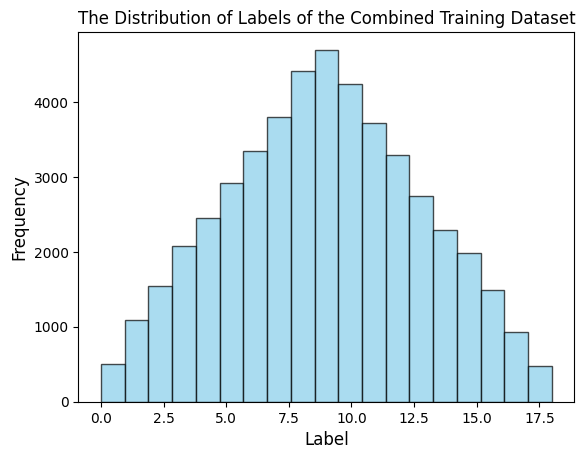

In [ ]:
#Distribution of the traning labels of the generated dataset
plt.hist(combined_y_train, bins=19, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("The Distribution of Labels of the Combined Training Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

Text(0, 0.5, 'Frequency')

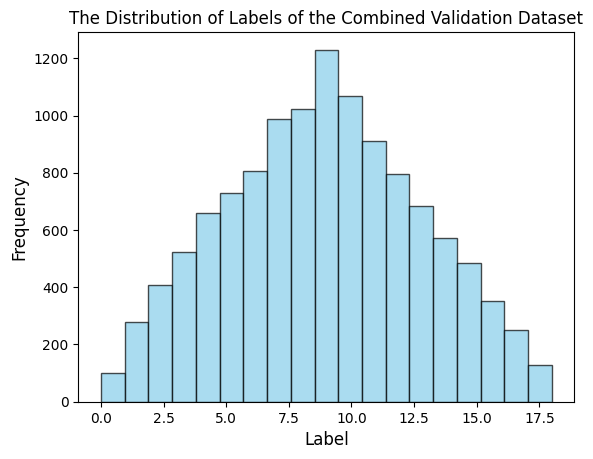

In [ ]:
#Distribution of the traning labels of the generated dataset
plt.hist(combined_y_val, bins=19, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("The Distribution of Labels of the Combined Validation Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

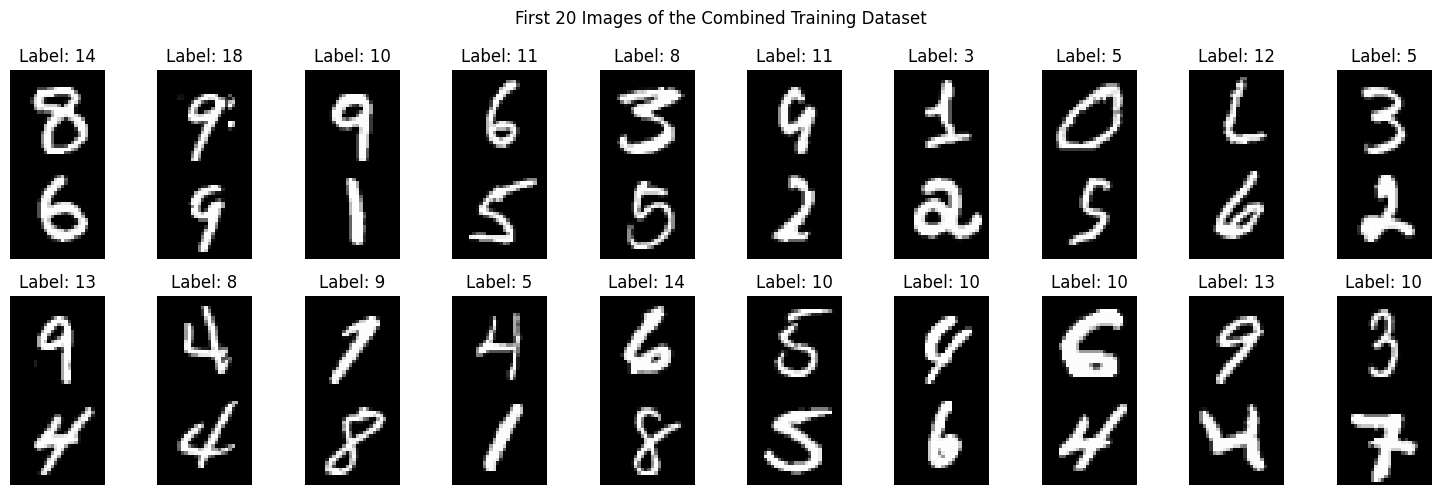

In [7]:
#Visualizing first 20 images of the new generated training dataset
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(combined_x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {combined_y_train[i]}")

plt.suptitle("First 20 Images of the Combined Training Dataset")
plt.tight_layout()
plt.show()

Generating the testing dataset

In [9]:
#Setting the seed to get reproducible test data generation
np.random.seed(seed_value)

#Combined images and labels datasets
combined_x_test=[]
combined_y_test=[]

#Sequential_lists are used to store individual testing images and labels of the combined data for further deconstruction (Question 4).
sequential_y1_test=[]
sequential_y2_test=[]
sequential_x1_test=[]
sequential_x2_test=[]

#Loop 'len(x_test)' times to get a new combined testing dataset of the same length as the original MNIST testing dataset
for i in range(len(x_test)):
  #Randomly select two images and their labels from testing data
  choice1, choice2= np.random.randint(0, len(x_test), 2)
  image1=x_test[choice1]
  label1=y_test[choice1]
  image2=x_test[choice2]
  label2=y_test[choice2]

  #Combine labels and images and append them to their corresponding lists
  #np.concatenate with axis=0, concatenates the images along their rows: resulting in 56x28 images
  combined_x_test.append(np.concatenate((image1,image2),axis=0))
  combined_y_test.append(label1+label2)

  #Store individual images and labels used in the combinations and append them to their corresponding lists
  sequential_y1_test.append(label1)
  sequential_y2_test.append(label2)
  sequential_x1_test.append(image1)
  sequential_x2_test.append(image2)


In [10]:
#Converting lists to arrays
combined_x_test=np.array(combined_x_test)
combined_y_test=np.array(combined_y_test)

#Convert sequential lists to arrays
sequential_y1_test=np.array(sequential_y1_test)
sequential_y2_test=np.array(sequential_y2_test)
sequential_x1_test=np.array(sequential_x1_test)
sequential_x2_test=np.array(sequential_x2_test)

In [11]:
#Checking that the dimensions of our newly generated testing data are correct
print("Size of the new testing image dataset:", combined_x_test.shape)
print("Size of the new testing label dataset:", combined_y_test.shape)

Size of the new testing image dataset: (10000, 56, 28)
Size of the new testing label dataset: (10000,)


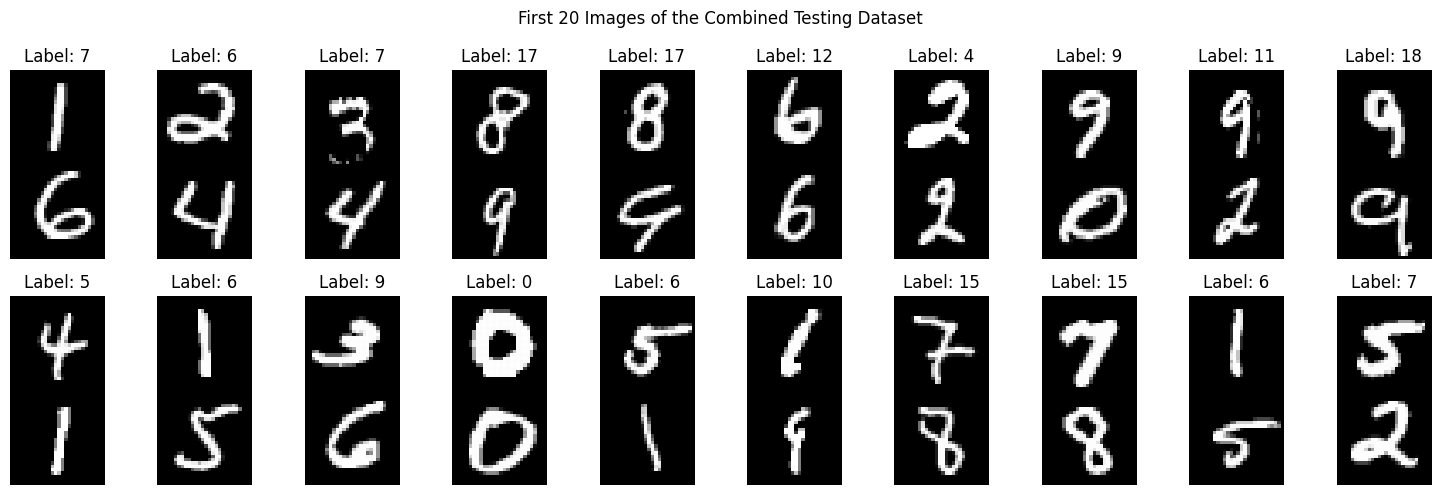

In [ ]:
#Visualizing first 20 images of the new generated testing data
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(combined_x_test[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {combined_y_test[i]}")

plt.suptitle("First 20 Images of the Combined Testing Dataset")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

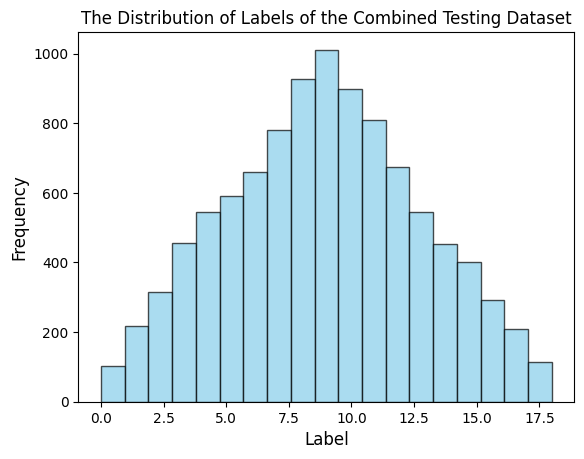

In [ ]:
#Distribution of the testing labels of the generated dataset
plt.hist(combined_y_test, bins=19, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("The Distribution of Labels of the Combined Testing Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Neural Networks

In [13]:
#Importing libraries for neural networks
import optuna
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization

from tensorflow.python.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

/home/hhmmer2/gitlabM1/envM1/gitM1/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
#Conversion to adapt the data to tensorflow and get more precision on accuracy and parameters
NNx_train = combined_x_train.astype('float32')
NNx_test = combined_x_test.astype('float32')
NNx_val= combined_x_val.astype('float32')

In [15]:
num_classes=19

#Convert labels to one hot encoded vectors
NNy_train = to_categorical(combined_y_train, num_classes)
NNy_test = to_categorical(combined_y_test, num_classes)
NNy_val= to_categorical(combined_y_val, num_classes)

Base neural network model

In [22]:
#Setting the seed to ensure reproducibility
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.config.experimental.enable_op_determinism()
tf.keras.utils.set_random_seed(seed_value)

#First base neural network with 1 layer

#Build the model
input_network_best_model = Input(shape=(56,28))
x = Flatten()(input_network_best_model)
x = Dense(50, activation='relu')(x)
y = Dense(19, activation='softmax')(x)

base_model= Model(input_network_best_model ,outputs=y)
#Compile the model
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history_base =base_model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=1,validation_data=(NNx_val, NNy_val))
#Evaluate the model
base_score =base_model.evaluate(NNx_test,NNy_test, verbose=0)
base_accuracy = base_score[1]
print("Test accuracy for the first base neural network is",base_accuracy)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1565 - loss: 2.5559 - val_accuracy: 0.3699 - val_loss: 1.9483
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4159 - loss: 1.8124 - val_accuracy: 0.5116 - val_loss: 1.5432
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5386 - loss: 1.4645 - val_accuracy: 0.5622 - val_loss: 1.3619
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5978 - loss: 1.2831 - val_accuracy: 0.6046 - val_loss: 1.2416
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6379 - loss: 1.1584 - val_accuracy: 0.6321 - val_loss: 1.1680
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6637 - loss: 1.0764 - val_accuracy: 0.6463 - val_loss: 1.1214
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6856 - loss: 1.0170 - val_accuracy: 0.6556 - val_loss: 1.0900
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6998 - loss: 0.9708 - val_accuracy: 0.

In [ ]:
#Saving the model and its weights
base_model.save('base_model.h5')
print("Model saved at: base_model.h5")
base_model.save_weights('base_model.weights.h5')
print("Weights saved at: base_model.weights.h5")
#Save the history
with open('base_training_history.json', 'w') as f:
    json.dump(history_base.history, f)
print("Training history saved at: base_training_history.json")


Model saved at: base_model.h5
Weights saved at: base_model.weights.h5
Training history saved at: base_training_history.json


In [ ]:
#Save the test and training data
np.save("test_y_data.npy", NNy_test)
print("Test labels saved at: test_y_data.npy")
np.save("test_x_data.npy", NNx_test)
print("Test images saved at: test_x_data.npy")

Test labels saved at: test_y_data.npy
Test images saved at: test_x_data.npy


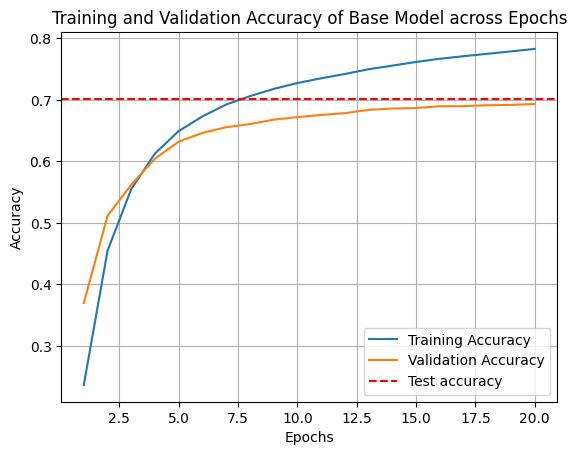

In [24]:
#Extract accuracy and validation accuracy from the history object
base_train_accuracy = history_base.history['accuracy']
base_val_accuracy = history_base.history['val_accuracy']

#Plot training and validation accuracy of different epochs
plt.plot(range(1, 21), base_train_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), base_val_accuracy, label='Validation Accuracy')
plt.axhline(y=base_accuracy, color='r', linestyle='--', label='Test accuracy')
plt.title('Training and Validation Accuracy of Base Model across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Studies



1.   Exploration study (refer to the report for more details)




In [ ]:
#Setting the seed to get reproducible trials and parameters selection
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

#Hyperparameter tuning using optuna function from M1 course material
def objective_Explore(trial):
    #Suggest hyperparameters
    num_layers = trial.suggest_int('num_layers', 3,10)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid','tanh'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    units = trial.suggest_int('units', 50, 400)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    #Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(56, 28)))
    for _ in range(num_layers):
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(19, activation='softmax'))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Train the model
    history = model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=0,validation_data=(NNx_val, NNy_val))

    #Evaluate the model
    score = model.evaluate(NNx_test, NNy_test, verbose=0)
    accuracy = score[1]
    return accuracy

#Create an Optuna study and optimize the objective function
#Saving the study so that it can be loaded after
study_Explore = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=seed_value),storage='sqlite:///study1.db', study_name='MyStudy', load_if_exists=True)

#Case where the study has reached its end
if len(study_Explore.trials) >= 20:
    print("Study has reached 20 trials. Resetting the study.")
    #If number of studies has reached 20, delete the study
    optuna.delete_study(study_name='MyStudy', storage='sqlite:///study1.db')

    #Restart the study
    study_Explore = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=seed_value),
        storage='sqlite:///study1.db',
        study_name='MyStudy',
        load_if_exists=False)

study_Explore.optimize(objective_Explore, n_trials=20-len(study_Explore.trials))

#Print the best trial
print('Best trial:')
print(f' Value: {study_Explore.best_trial.value}')
print(' Params: ')
for key, value in study_Explore.best_trial.params.items():
    print(f'    {key}: {value}')


[I 2024-12-17 21:43:45,882] A new study created in RDB with name: MyStudy
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-12-17 21:45:27,166] Trial 0 finished with value: 0.33660000562667847 and parameters: {'num_layers': 5, 'activation': 'relu', 'dropout_rate': 0.07800932022121826, 'units': 104, 'learning_rate': 1.493656855461762e-05}. Best is trial 0 with value: 0.33660000562667847.
[I 2024-12-17 21:51:56,308] Trial 1 finished with value: 0.10109999775886536 and parameters: {'num_layers': 9, 'activation': 'sigmoid', 'dropout_rate': 0.48495492608099716, 'units': 342, 'learning_rate': 4.335281794951564e-05}. Best is trial 0 with value: 0.33660000562667847.
[I 2024-12-17 21:54:03,553] Trial 2 finished with value: 0.8745999932289124 and 

Best trial:
 Value: 0.9081000089645386
 Params: 
    num_layers: 3
    activation: relu
    dropout_rate: 0.15585553804470548
    units: 232
    learning_rate: 0.00043664735929796326


2.   Study 1: Tuning activation Function

In [ ]:
#Setting the seed to ensure reproducibility
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

#Fix previous hyperparameters (see report)
dropout_rate = 0.15585553804470548
units = 232
learning_rate =0.00043664735929796326

#No need for optuna as we only have 3 activations
#List of activations to experiment with
activations = ['relu', 'sigmoid', 'tanh']

# Function to build and train models with different activation functions
def Activation_tuning(activation):

    #Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(56, 28)))

    for _ in range(3):
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(19, activation='softmax'))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=0,
                        validation_data=(NNx_val, NNy_val))

    #Evaluate the model
    score = model.evaluate(NNx_test, NNy_test, verbose=0)
    accuracy = score[1]
    return accuracy

#Train and evaluate models with different activation functions
for activation in activations:
    accuracy = Activation_tuning(activation)
    print("Test accuracy with ", activation, ": ", accuracy)

Test accuracy with  relu :  0.9078999757766724
Test accuracy with  sigmoid :  0.8413000106811523
Test accuracy with  tanh :  0.8687999844551086




3.   Study 2: tuning the learning rate of the Adam optimizer



In [27]:
#Setting the seed to get reproducible trials and parameters selection
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


#Hyperparameter tuning using function from M1 course material
def objective2(trial):
    #Fix previous hyperparameters (see report)
    num_layers = 3
    activation = 'relu'
    dropout_rate =  0.1558555380447054
    units = 232
    #Suggest learning rate
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)

    #Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(56, 28)))
    for _ in range(num_layers):
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(19, activation='softmax'))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Train the model
    history = model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=0,validation_data=(NNx_val, NNy_val))

    # Evaluate the model
    score = model.evaluate(NNx_test, NNy_test, verbose=0)
    accuracy = score[1]
    return accuracy

#Create an Optuna study and optimize the objective function
#Saving the study so that it can be loaded after
study2 = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=19),storage='sqlite:///study2.db', study_name='MyStudy2', load_if_exists=True)
if len(study2.trials) >= 20:
    print("Study has reached 22 trials. Resetting the study.")
    #If number of studies has reached 20, delete the study
    optuna.delete_study(study_name='MyStudy2', storage='sqlite:///study2.db')

    #Restart the study
    study2 = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=19),
        storage='sqlite:///study2.db',
        study_name='MyStudy2',
        load_if_exists=False)

study2.optimize(objective2, n_trials=20-len(study2.trials))

#Print the best trial
print('Best trial:')
print(f' Value: {study2.best_trial.value}')
print(' Params: ')
for key, value in study2.best_trial.params.items():
    print(f'    {key}: {value}')


[I 2024-12-18 15:10:18,485] A new study created in RDB with name: MyStudy2
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-12-18 15:13:01,997] Trial 0 finished with value: 0.8813999891281128 and parameters: {'learning_rate': 0.00019615564247231607}. Best is trial 0 with value: 0.8813999891281128.
[I 2024-12-18 15:15:24,417] Trial 1 finished with value: 0.18140000104904175 and parameters: {'learning_rate': 0.019219812652967554}. Best is trial 0 with value: 0.8813999891281128.
[I 2024-12-18 15:18:04,646] Trial 2 finished with value: 0.9060999751091003 and parameters: {'learning_rate': 0.0005505717444838654}. Best is trial 2 with value: 0.9060999751091003.
[I 2024-12-18 15:20:38,953] Trial 3 finished with value: 0.8949999809265137 and par

Best trial:
 Value: 0.9132000207901001
 Params: 
    learning_rate: 0.000987051220400902




4.   Study 3: optimizing the number of layers and units per layer



In [28]:
#Setting the seed to get reproducible trials and parameters selection
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

#Hyperparameter tuning using function from M1 course material
def objective3(trial):
    #Suggest hyperparameters
    num_layers = trial.suggest_int('num_layers', 3,7)
    units = [ trial.suggest_int(f'units_layer_{i}',50,300) for i in range(num_layers)]
    #Fix previous hyperparameters (see report)
    learning_rate = 0.000987051220400902
    activation = 'relu'
    dropout_rate = 0.1558555380447054

    #Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(56, 28)))
    for i in range(num_layers):
        model.add(Dense(units=units[i], activation=activation))
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(19, activation='softmax'))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Train the model
    history = model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=0,validation_data=(NNx_val, NNy_val))

    # Evaluate the model
    score = model.evaluate(NNx_test, NNy_test, verbose=0)
    accuracy = score[1]
    return accuracy

#Create an Optuna study and optimize the objective function

#Saving the study so that it can be loaded after
study3 = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=23),storage='sqlite:///study_3.db', study_name='MyStudy_3', load_if_exists=True)


# Check the number of completed trials
if len(study3.trials) >= 22:
    print("Study has reached 22 trials. Resetting the study.")
    #If number of studies has reached 20, delete the study
    optuna.delete_study(study_name='MyStudy_3', storage='sqlite:///study_3.db')
    #Restart the study
    study3 = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=23),
        storage='sqlite:///study_3.db',
        study_name='MyStudy_3',
        load_if_exists=False)

study3.optimize(objective3, n_trials=22-len(study3.trials))

#Print the best trial
print('Best trial:')
print(f' Value: {study3.best_trial.value}')
print(' Params: ')
for key, value in study3.best_trial.params.items():
    print(f'    {key}: {value}')


[I 2024-12-18 16:02:32,492] A new study created in RDB with name: MyStudy_3
[I 2024-12-18 16:05:30,755] Trial 0 finished with value: 0.9146999716758728 and parameters: {'num_layers': 5, 'units_layer_0': 287, 'units_layer_1': 242, 'units_layer_2': 120, 'units_layer_3': 105, 'units_layer_4': 222}. Best is trial 0 with value: 0.9146999716758728.
[I 2024-12-18 16:07:04,506] Trial 1 finished with value: 0.8988000154495239 and parameters: {'num_layers': 3, 'units_layer_0': 148, 'units_layer_1': 205, 'units_layer_2': 153}. Best is trial 0 with value: 0.9146999716758728.
[I 2024-12-18 16:10:14,766] Trial 2 finished with value: 0.907800018787384 and parameters: {'num_layers': 3, 'units_layer_0': 271, 'units_layer_1': 272, 'units_layer_2': 125}. Best is trial 0 with value: 0.9146999716758728.
[I 2024-12-18 16:13:09,431] Trial 3 finished with value: 0.9107000231742859 and parameters: {'num_layers': 5, 'units_layer_0': 295, 'units_layer_1': 262, 'units_layer_2': 66, 'units_layer_3': 123, 'units_la

Best trial:
 Value: 0.9210000038146973
 Params: 
    num_layers: 5
    units_layer_0: 253
    units_layer_1: 219
    units_layer_2: 112
    units_layer_3: 198
    units_layer_4: 215




5. Study 4: optimizing the dropout rate



In [29]:
#Setting the seed to get reproducible trials and parameters selection
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

#Hyperparameter tuning using function from M1 course material
def objective4(trial):
    #Suggest hyperparameters
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    #Fix previous hyperparameters (see report)
    num_layers=5
    activation = 'relu'
    units =[289,276,176,255,257]
    learning_rate=0.000987051220400902

    #Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(56, 28)))
    for i in range(num_layers):
        model.add(Dense(units=units[i], activation=activation))
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(19, activation='softmax'))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Train the model
    history = model.fit(NNx_train, NNy_train,
                        epochs=20,
                        batch_size=128,
                        verbose=0,validation_data=(NNx_val, NNy_val))

    # Evaluate the model
    score = model.evaluate(NNx_test, NNy_test, verbose=0)
    accuracy = score[1]
    return accuracy

#Create an Optuna study and optimize the objective function
#Saving the study so that it can be loaded after
study4 = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=22),
    storage='sqlite:///study_4.db',
    study_name='MyStudy_4',
    load_if_exists=True
)

# Check the number of completed trials
if len(study4.trials) >= 20:
    print("Study has reached 20 trials. Resetting the study.")
    #If number of studies has reached 20, delete the study
    optuna.delete_study(study_name='MyStudy_4', storage='sqlite:///study_4.db')
    #Restart the study
    study4 = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=22),
        storage='sqlite:///study_4.db',
        study_name='MyStudy_4',
        load_if_exists=False)

study4.optimize(objective4, n_trials=20-len(study4.trials))

#Print the best trial
print('Best trial:')
print(f' Value: {study4.best_trial.value}')
print(' Params: ')
for key, value in study4.best_trial.params.items():
    print(f'    {key}: {value}')


[I 2024-12-18 17:04:49,864] A new study created in RDB with name: MyStudy_4
[I 2024-12-18 17:08:00,875] Trial 0 finished with value: 0.9185000061988831 and parameters: {'dropout_rate': 0.10423026867942131}. Best is trial 0 with value: 0.9185000061988831.
[I 2024-12-18 17:11:18,789] Trial 1 finished with value: 0.9164000153541565 and parameters: {'dropout_rate': 0.24084053088168295}. Best is trial 0 with value: 0.9185000061988831.
[I 2024-12-18 17:14:30,012] Trial 2 finished with value: 0.914900004863739 and parameters: {'dropout_rate': 0.21026901765718736}. Best is trial 0 with value: 0.9185000061988831.
[I 2024-12-18 17:17:39,102] Trial 3 finished with value: 0.870199978351593 and parameters: {'dropout_rate': 0.42959099926067207}. Best is trial 0 with value: 0.9185000061988831.
[I 2024-12-18 17:20:52,128] Trial 4 finished with value: 0.9218999743461609 and parameters: {'dropout_rate': 0.08558077680583664}. Best is trial 4 with value: 0.9218999743461609.
[I 2024-12-18 17:24:07,133] Tri

Best trial:
 Value: 0.9218999743461609
 Params: 
    dropout_rate: 0.08558077680583664


## Best neural network

Further tuning: Batch Normalization and Early Stopping

In [17]:
#Setting the seed to ensure reproducibility
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.config.experimental.enable_op_determinism()
tf.keras.utils.set_random_seed(seed_value)

#Best model after our trials
#Best parameters
best_dropout=0.08558077680583664
best_units=[289,276,176,255,257]
best_learning_rate=0.000987051220400902
best_activation='relu'
best_layers=5

#Build the network with batch normalization
input_network_early = Input(shape=(56,28))
x_early=Flatten()(input_network_early)
for i in range(best_layers):
    x_early=Dense(best_units[i], activation=best_activation)(x_early)
    x_early=Dropout(best_dropout)(x_early)
    x_early=BatchNormalization()(x_early)
y_early=Dense(19, activation='softmax')(x_early)

#Build new model with same parameters as the best model found previously.
best_model_early=Model(input_network_early ,outputs=y_early)
best_model_early.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),loss='categorical_crossentropy', metrics=['accuracy'])

#Define the EarlyStopping callback
early_stopping=EarlyStopping(
    monitor='val_accuracy',
    #Number of epochs with no improvement to wait before stopping
    patience=7,
    restore_best_weights=True
)

#Train the model with Early Stopping
history_best_early=best_model_early.fit(
    NNx_train, NNy_train,
    #Set upper limit for our epoch size
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(NNx_val, NNy_val),
    callbacks=[early_stopping]
)

#Evaluate the model
best_score_early= best_model_early.evaluate(NNx_test, NNy_test, verbose=0)
best_accuracy_early= best_score_early[1]
print("\n")
print("Test accuracy for the best model with Early Stopping is", best_accuracy_early )

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2652 - loss: 2.4579 - val_accuracy: 0.7321 - val_loss: 0.8355
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7076 - loss: 0.9372 - val_accuracy: 0.8271 - val_loss: 0.5574
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8099 - loss: 0.6272 - val_accuracy: 0.8587 - val_loss: 0.4898
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8579 - loss: 0.4713 - val_accuracy: 0.8824 - val_loss: 0.3991
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8860 - loss: 0.3713 - val_accuracy: 0.8931 - val_loss: 0.3553
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9056 - loss: 0.3105 - val_accuracy: 0.9077 - val_loss: 0.3312
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9188 - loss: 0.2641 - val_accuracy: 0.9070 - val_loss: 0.3350
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9312 - loss: 0.2229 - val_acc

Saving the best model and its weights

In [18]:
#Save the best model and its weights
best_model_early.save("best_model.h5")
print("Model saved at: best_model.h5")
best_model_early.save_weights("best_model.weights.h5")
print("Model weights saved at: best_model_weights.h5")

#Save the history of the best model
with open('best_training_history.json', 'w') as f:
    json.dump(history_best_early.history, f)
print("Training history saved at: best_training_history.json")

Model saved at: best_model.h5
Model weights saved at: best_model_weights.h5
Training history saved at: best_training_history.json


In [19]:
print(best_model_early.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 56, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 289)            │       453,441 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 289)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 289)            │         1,156 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 276)            │        80,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 276)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 276)            │         1,104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 176)            │        48,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 176)            │           704 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 255)            │        45,135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 255)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 255)            │         1,020 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 257)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 257)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 257)            │         1,028 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 19)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,104,212 (8.03 MB)

 Trainable params: 700,568 (2.67 MB)

 Non-trainable params: 2,506 (9.79 KB)

 Optimizer params: 1,401,138 (5.34 MB)

None


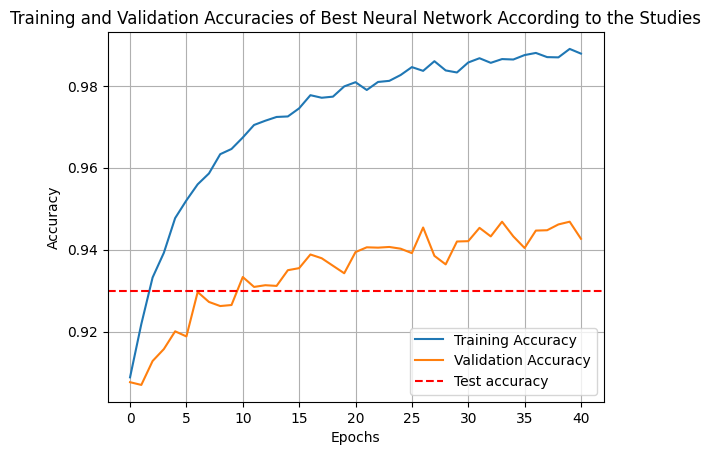

In [35]:
#Plot the Validation, Training and Testing accuracy of the best model
plt.plot(history_best_early.history['accuracy'][5:], label='Training Accuracy')
plt.plot(history_best_early.history['val_accuracy'][5:], label='Validation Accuracy')
plt.axhline(y=best_accuracy_early, color='r', linestyle='--', label='Test accuracy')
plt.title('Training and Validation Accuracies of Best Neural Network According to the Studies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Comparison between Best NN and Base NN

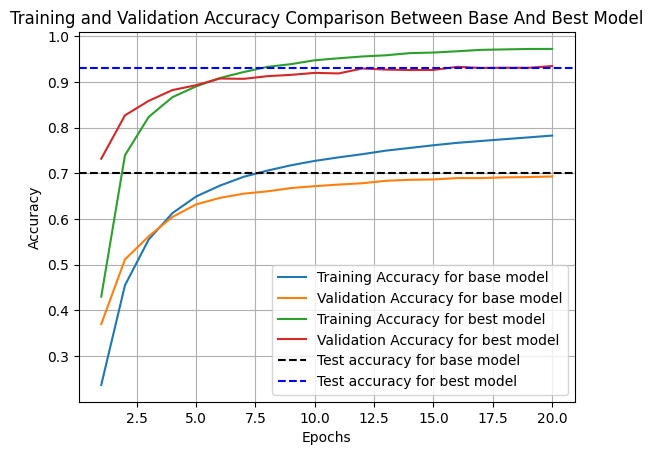

In [37]:
#Plot training and validation accuracy of the best model and of the base model
plt.plot(range(1, 21), base_train_accuracy, label='Training Accuracy for base model')
plt.plot(range(1, 21), base_val_accuracy, label='Validation Accuracy for base model')
plt.plot(range(1, 21), history_best_early.history['accuracy'][:20], label='Training Accuracy for best model')
plt.plot(range(1, 21), history_best_early.history['val_accuracy'][:20], label='Validation Accuracy for best model')
plt.axhline(y=base_accuracy,color='black', linestyle='--', label='Test accuracy for base model')
plt.axhline(y=best_accuracy_early,color='b', linestyle='--', label='Test accuracy for best model')
plt.title('Training and Validation Accuracy Comparison Between Base And Best Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Question 5: t-SNE

In [26]:
#t-SNE distribution of the various classes in the embedding layer
input_layer=best_model_early.input

#List to store different dense layers
dense=[]
for layers in best_model_early.layers:
  if isinstance(layers, Dense):
    dense.append(layers)

#Embedding layer is the layer before the output
embedding=dense[-2]
embedding_layer=embedding.output
print("Embedding layer",embedding_layer)


#Use the embedding_model to extract the outputs of the embedding layer
embedding_model = Model(inputs=input_layer, outputs=embedding_layer)
embedding_output = embedding_model.predict(NNx_test)

#Apply t-SNE to reduce the feature dimensions
embedded_tsne = TSNE(perplexity=3,random_state=42).fit_transform(embedding_output)

Embedding layer <KerasTensor shape=(None, 257), dtype=float32, sparse=False, name=keras_tensor_32>
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


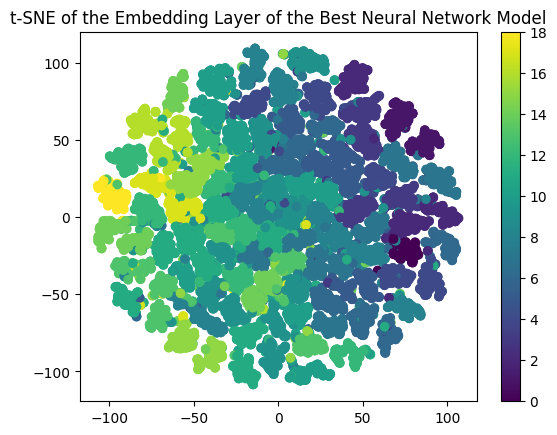

In [29]:
#Visualize t-SNE results
plt.scatter(embedded_tsne[:, 0], embedded_tsne[:, 1],c=combined_y_test, cmap='viridis')
plt.colorbar()
plt.title('t-SNE of the Embedding Layer of the Best Neural Network Model')
plt.show()

In [30]:
#Applying t-SNE on the input dataset
tsne_input_data =TSNE(perplexity=3,random_state=42).fit_transform(np.array(combined_x_test).reshape((-1, 56 * 28)))

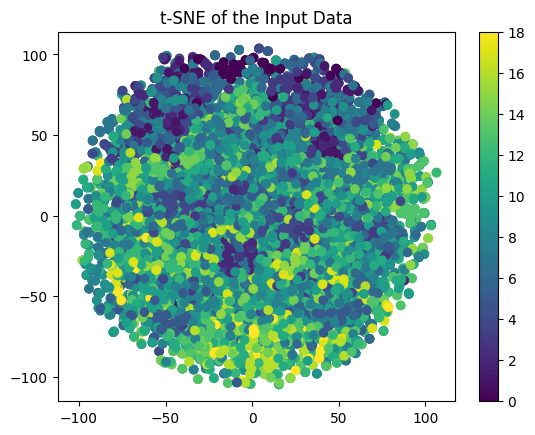

In [33]:
#Visualize t-SNE results
plt.scatter(tsne_input_data[:, 0], tsne_input_data[:, 1], c=combined_y_test, cmap='viridis')
plt.colorbar()
plt.title('t-SNE of the Input Data')
plt.show()

Optimising perplexity values

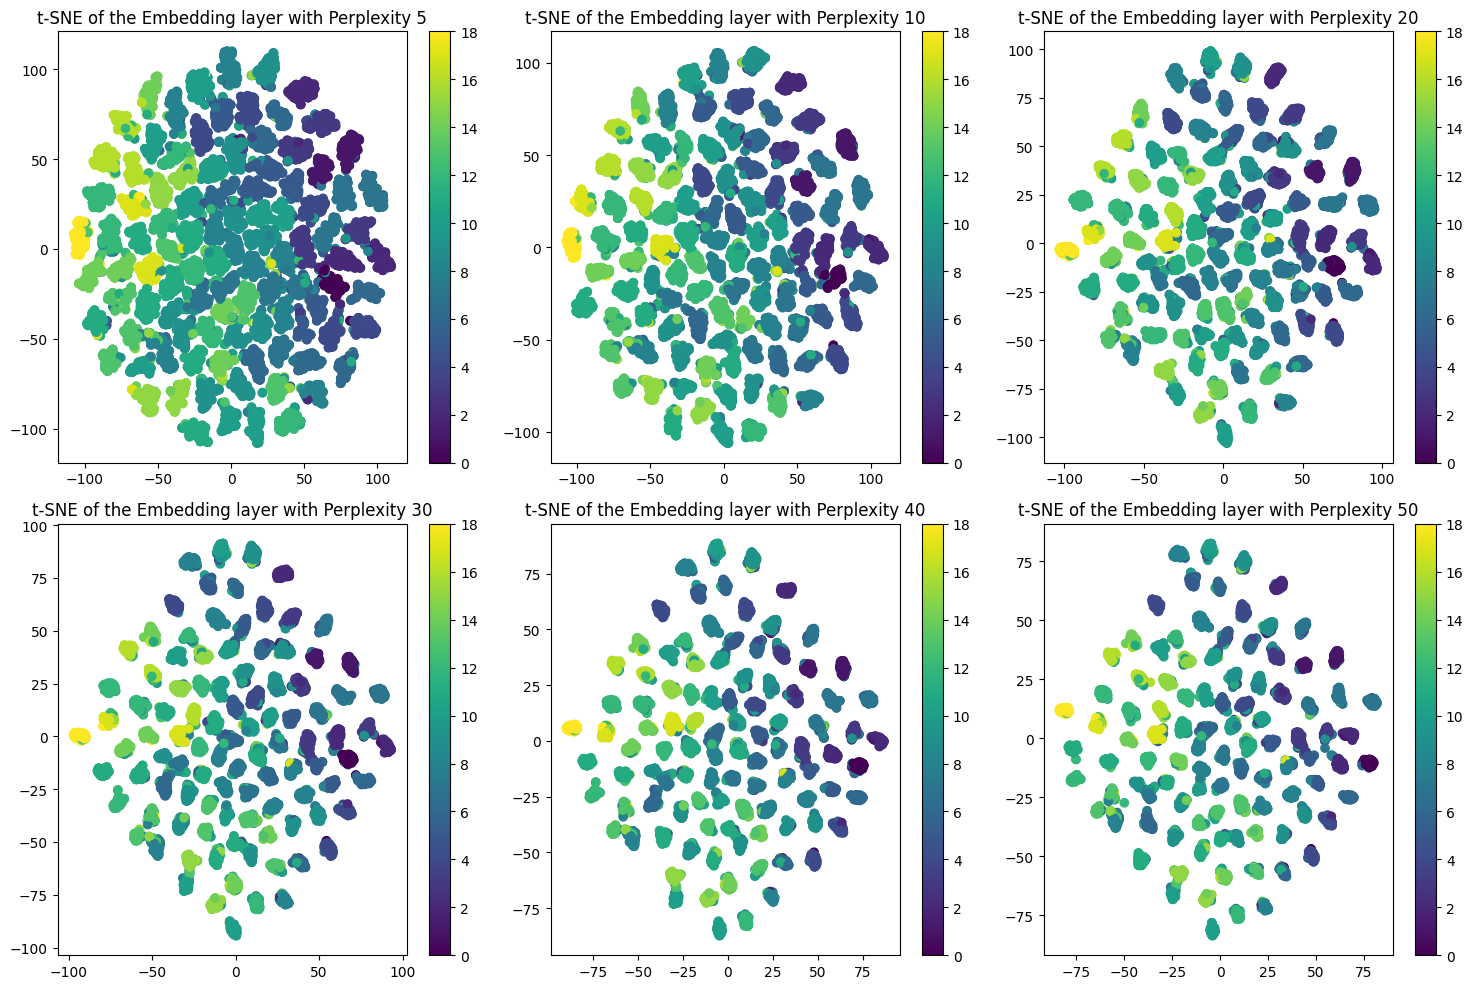

In [44]:
#Test a range of perplexity values
perplexity_list= [5, 10, 20, 30, 40, 50]
embedded_tsne = []

for perplexity in perplexity_list:
    tsne_result = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(embedding_output)
    embedded_tsne.append((perplexity, tsne_result))

#results for each perplexity on the embedding layer
plt.figure(figsize=(15, 10))
for i, (perplexity, tsne_result) in enumerate(embedded_tsne):
    plt.subplot(2, 3, i + 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=combined_y_test, cmap='viridis')
    plt.title(f"t-SNE of the Embedding layer with Perplexity {perplexity}")
    plt.colorbar()
plt.tight_layout()
plt.show()


# Question 3: Other models

In [40]:
#Flattening the input images for Logistic Regression (model expects 1D inputs)
combined_x_train_flattened = np.array(combined_x_train).reshape((-1, 56 * 28))
combined_x_test_flattened = np.array(combined_x_test).reshape((-1, 56 * 28))
combined_x_val_flattened=np.array(combined_x_val).reshape((-1, 56 * 28))

#Checking the new dimensions of the flattened training and test sets
print("Shape of the flattened training image dataset:",combined_x_train_flattened.shape)
print("Shape of the flattened testing image dataset:",combined_x_test_flattened.shape)

Shape of the flattened training image dataset: (48000, 1568)
Shape of the flattened testing image dataset: (10000, 1568)


## Logistic regression

In [ ]:
#Logistic regression with default parameters
base_model = LogisticRegression()
base_model.fit(combined_x_train_flattened, combined_y_train)

#Evaluate model on the test set to get testing accuracy
base_test=base_model.score(combined_x_test_flattened, combined_y_test)
print("Test set accuracy for logistic regression with default parameters :", base_test)

#Evaluate model on the training set to get training accuracy
base_train=base_model.score(combined_x_train_flattened, combined_y_train)
print("Training set accuracy for logistic regression with default parameters :", base_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set accuracy for logistic regression with default parameters : 0.2204
Training set accuracy for logistic regression with default parameters : 0.3010833333333333


Hyperparameter tuning Logistic regression:
Tuning regularization strengths and solvers

In [ ]:
#Hyperparameters tuning

#C_values: A list of different regularization strengths to try during model training
C_values=[0.1, 1, 10, 100, 1000, 1e15]

#Solvers: A list of optimization solvers to use for training the logistic regression model
solvers=['lbfgs', 'sag']

#Lists to store testing and validation accuracies
CStest_accuracies=[]
CSval_accuracies=[]
best_model = None
best_val=-1

'''
This code iterates through every single solver and every single penalty value and saves the training, test, and validation accuracies for each combination of parameters.
It also keeps track of the best model by comparing the validation accuracy for each pair of parameters, and chooses the model with the highest validation accuracy.
'''
for c in C_values:
  for solver in solvers:
      print("C:", c, "Solver:", solver)
      model= LogisticRegression(C=c, penalty='l2', solver=solver, tol=0.01,max_iter=100)
      model.fit(combined_x_train_flattened, combined_y_train)

      #Evaluate on the test set to compare model performances
      test_score = model.score(combined_x_test_flattened, combined_y_test)
      CStest_accuracies.append(test_score)

      #Evaluate on the validation set to choose best model
      val_score = model.score(combined_x_val_flattened, combined_y_val)
      print("test:", val_score)
      CSval_accuracies.append(val_score)
      #Best model is the one that has the highest validation accuracy
      if val_score > best_val:
                best_val = val_score
                best_model = model

C: 0.1 Solver: lbfgs
test: 0.16383333333333333
C: 0.1 Solver: sag
test: 0.228
C: 1 Solver: lbfgs
test: 0.16358333333333333
C: 1 Solver: sag
test: 0.219
C: 10 Solver: lbfgs
test: 0.16358333333333333
C: 10 Solver: sag
test: 0.21708333333333332
C: 100 Solver: lbfgs
test: 0.16358333333333333
C: 100 Solver: sag
test: 0.21691666666666667
C: 1000 Solver: lbfgs
test: 0.16358333333333333
C: 1000 Solver: sag
test: 0.21675
C: 1000000000000000.0 Solver: lbfgs
test: 0.16358333333333333
C: 1000000000000000.0 Solver: sag
test: 0.21725


In [ ]:
#Visualization of the results of the hyperparameter tuning on regularization strengths and solvers
results1 = pd.DataFrame({
    'C Value': [str(c) for c in C_values for _ in solvers],  #Repeating C for each solver
    'Solver': solvers * len(C_values),  #Repeating solvers for each C value
    'Test Accuracy': CStest_accuracies,
    'Validation Accuracy': CSval_accuracies
})
print("Training, Testing and Validation Accuracies of Logistic Regression for Different Penalty Values and Solvers:")
print("\n")
print(tabulate(results1, headers='keys', tablefmt='grid', showindex=False))


Training, Testing and Validation Accuracies of Logistic Regression for Different Penalty Values and Solvers:


+-----------+----------+-----------------+-----------------------+
|   C Value | Solver   |   Test Accuracy |   Validation Accuracy |
+===========+==========+=================+=======================+
|     0.1   | lbfgs    |          0.1636 |              0.163833 |
+-----------+----------+-----------------+-----------------------+
|     0.1   | sag      |          0.2247 |              0.228    |
+-----------+----------+-----------------+-----------------------+
|     1     | lbfgs    |          0.1636 |              0.163583 |
+-----------+----------+-----------------+-----------------------+
|     1     | sag      |          0.2201 |              0.219    |
+-----------+----------+-----------------+-----------------------+
|    10     | lbfgs    |          0.1636 |              0.163583 |
+-----------+----------+-----------------+-----------------------+
|    10     | sag 

Tuning: max_iterations

In [ ]:
#Hyperparameters tuning

#Iterations: A list of different max_iterations values for model training
iterations=[100,500,1000,1500]

#Lists to store testing and validation accuracies
ctrain_accuracies=[]
cval_accuracies=[]
best_model = None
best_val=-1

'''
This code iterates through every single max_iteration in the iterations list and saves the training, test, and validation accuracies.
It also keeps track of the best model by comparing the validation accuracy for each iteration, and chooses the model with the highest validation accuracy.
'''
for i in iterations:
  print("Iteration:", i)
  model= LogisticRegression(C=0.1, penalty='l2', solver='sag', tol=0.01,max_iter=i)
  model.fit(combined_x_train_flattened, combined_y_train)

  #Evaluate on the test set
  test_score = model.score(combined_x_test_flattened, combined_y_test)
  ctrain_accuracies.append(test_score)

  #Evaluate on the validation set to choose best model
  val_score = model.score(combined_x_val_flattened, combined_y_val)
  print("Test accuracy:", val_score)
  cval_accuracies.append(val_score)

  #Best model is the one that has the highest validation accuracy
  if val_score > best_val:
                best_val = val_score
                best_model = model



Iteration: 100
Test accuracy: 0.22841666666666666
Iteration: 500
Test accuracy: 0.22725
Iteration: 1000
Test accuracy: 0.22775
Iteration: 1500
Test accuracy: 0.22825


In [ ]:
#Visualization of the results of the hyperparameter tuning on the number of max_iterations
results2 = pd.DataFrame({
    'Iterations': iterations,
    'Test Accuracy': ctrain_accuracies,
    'Validation Accuracy': cval_accuracies
})

print("Training, Testing and Validation Accuracies of Logistic Regression for Different Max_Iter Values")
print("\n")
print(tabulate(results2, headers='keys', tablefmt='grid', showindex=False))


Training, Testing and Validation Accuracies of Logistic Regression for Different Max_Iter Values


+--------------+-----------------+-----------------------+
|   Iterations |   Test Accuracy |   Validation Accuracy |
+==============+=================+=======================+
|          100 |          0.2253 |              0.228417 |
+--------------+-----------------+-----------------------+
|          500 |          0.2237 |              0.22725  |
+--------------+-----------------+-----------------------+
|         1000 |          0.2249 |              0.22775  |
+--------------+-----------------+-----------------------+
|         1500 |          0.2242 |              0.22825  |
+--------------+-----------------+-----------------------+


## Question 4:

(48000, 28, 28)
(48000,)
(48000, 28, 28)
(10000, 28, 28)
(10000,)
(10000, 28, 28)




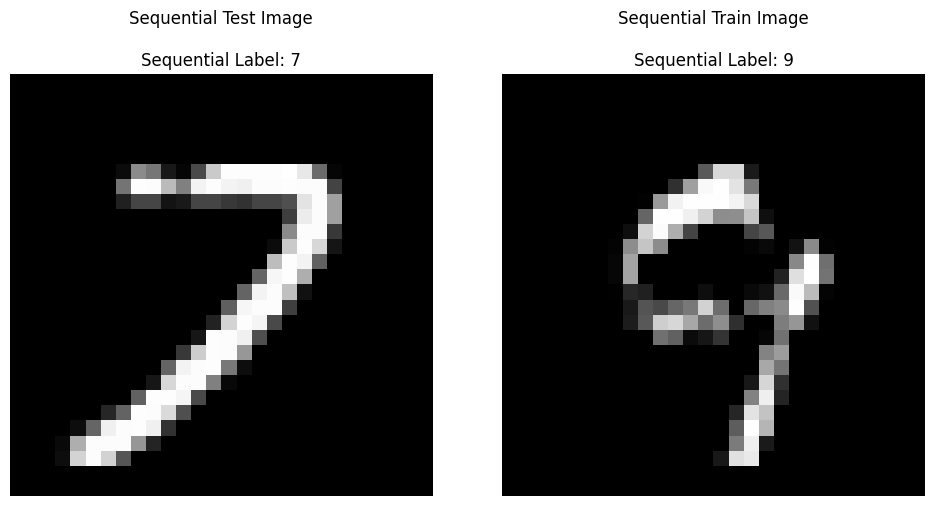

In [ ]:
#Checking the dimensions of the sequential training and test data
print(sequential_x1_train.shape)
print(sequential_y1_train.shape)
print(sequential_x2_train.shape)
print(sequential_x1_test.shape)
print(sequential_y1_test.shape)
print(sequential_x2_test.shape)
print("\n")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Displaying a sample image from the test set(first sequential image) and its corresponding label to make sure they match
axes[0].imshow(sequential_x1_test[700], cmap='gray')
axes[0].set_title(f"Sequential Test Image\n\nSequential Label: {sequential_y1_test[700]}")
axes[0].axis('off')

#Displaying a sample image from the training set (first sequential image) and its corresponding label to make sure they match
axes[1].imshow(sequential_x1_train[70], cmap='gray')
axes[1].set_title(f"Sequential Train Image\n\nSequential Label: {sequential_y1_train[70]}")
axes[1].axis('off')
plt.tight_layout()
plt.show()

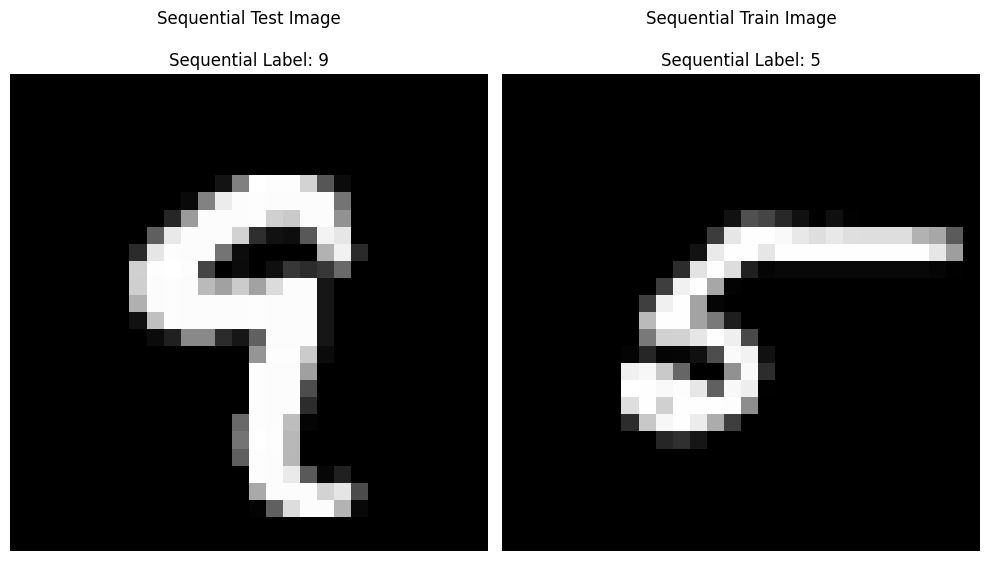

In [ ]:
#Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

#Displaying a sample image from the test set (first sequential image)
axes[0].imshow(sequential_x1_test[60], cmap='gray')
axes[0].set_title(f"Sequential Test Image\n\nSequential Label: {sequential_y1_test[60]}")
axes[0].axis('off')

#Displaying a sample image from the training set (second sequential image)
axes[1].imshow(sequential_x2_test[60], cmap='gray')
axes[1].set_title(f"Sequential Train Image\n\nSequential Label: {sequential_y2_test[60]}")
axes[1].axis('off')

plt.tight_layout()

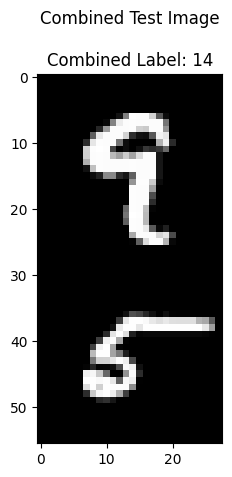

In [ ]:
#Displaying the corresponding combined y_train image to make sure the deconstruction has been correctly done.
plt.imshow(combined_x_test[60], cmap='gray')
plt.title(f"Combined Test Image\n\nCombined Label: {combined_y_test[60]}")
plt.show()


In [42]:
#Lists to store the accuracies and probabilities of the logistic regression model trained on combined data and of the model trained sequentially on individual data
combined_accuracy=[]
sequential_accuracy=[]
training_sequential_accuracy=[]
training_combined_accuracy=[]

#Different sample size for model training
sample_sizes = [50, 100, 500, 1000,5000,10000,15000]

for size in sample_sizes:
    #Logistic regression models initialization using l2 regularization and best hyperparameters found in hyperparameters tuning
    log_reg_image1 = LogisticRegression( C=0.1, penalty='l2', solver='sag', tol=0.01)
    log_combined = LogisticRegression(C=0.1, penalty='l2', solver='sag', tol=0.01)

    #Training the combined model on the two combined data
    log_combined.fit(combined_x_train_flattened[:size],combined_y_train[:size])

    #Computing the accuracy of the combined model on the test set
    acc_combined = accuracy_score(combined_y_test, log_combined.predict(combined_x_test_flattened))
    combined_accuracy.append(acc_combined)

    #Computing the accuracy of the combined model on the training set
    acc_training_combined = accuracy_score(combined_y_train, log_combined.predict(combined_x_train_flattened))
    training_combined_accuracy.append(acc_training_combined)


    #Training the single linear model on the two images of the combined data sequentially
    log_reg_image1.fit(np.concatenate((sequential_x1_train[:size], sequential_x2_train[:size]), axis=0).reshape((-1,784)), np.concatenate((sequential_y1_train[:size], sequential_y2_train[:size]), axis=0))

    #Predict probabilities for both image1 and image2 of the test set using the single linear model trained sequentially

    #prob_image1 is a list of probabilities for each class predicted by logistic regression for image1
    prob_image1 = log_reg_image1.predict_proba(sequential_x1_test.reshape((-1,784)))
    #prob_image2 is a list of probabilities for each class predicted by logistic regression for image2
    prob_image2 = log_reg_image1.predict_proba(sequential_x2_test.reshape((-1,784)))
    #Determine the predicted class for each test sample by selecting the class with the highest probability
    prob_sequential =np.argmax( prob_image1,axis=1) + np.argmax( prob_image2,axis=1)
    #True label is the sum of the true labels for image1 and image2.
    true_sequential = np.array(sequential_y1_test) + np.array(sequential_y2_test)

    #Computing the accuracy of the sequential model on the test set
    acc_sequential = accuracy_score(prob_sequential, true_sequential)
    sequential_accuracy.append(acc_sequential)

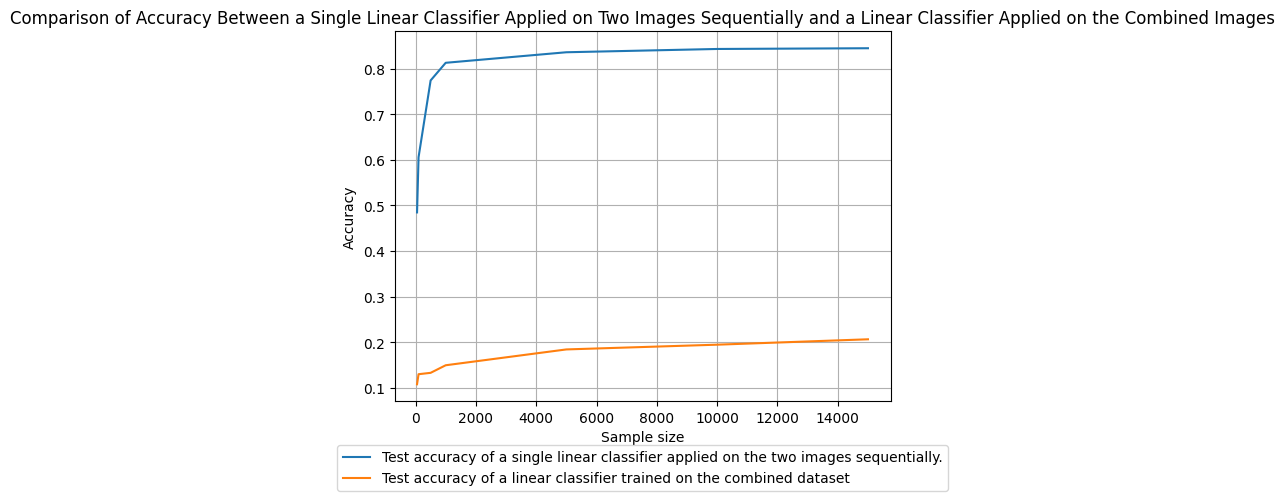

In [43]:
#Comparing the accuracies of the Logistic regression model trained on combined data and of the model trained sequentially on individual data
plt.plot(sample_sizes,sequential_accuracy,label="Test accuracy of a single linear classifier applied on the two images sequentially.")
plt.plot(sample_sizes,combined_accuracy,label="Test accuracy of a linear classifier trained on the combined dataset ")
plt.title("Comparison of Accuracy Between a Single Linear Classifier Applied on Two Images Sequentially and a Linear Classifier Applied on the Combined Images")
plt.xlabel("Sample size")
plt.ylabel("Accuracy")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.grid(True)
plt.show()

## Support vector machine

In [ ]:
#Support vector machine (with default parameters) trained and tested on the entire dataset
svcClass = SVC(gamma='auto')
svcClass.fit(combined_x_train_flattened, combined_y_train)

#Test accuracy
SVMscore_test=svcClass.score(combined_x_test_flattened, combined_y_test)
print("Test accuracy for SVM with default parameters: " ,SVMscore_test)

Test accuracy for SVM with default parameters:  0.3507


In [ ]:
#Training accuracy
SVMscore_train=svcClass.score(combined_x_train_flattened, combined_y_train)
print("Training accuracy for SVM with default parameters: ", SVMscore_train)

Training accuracy for SVM with default parameters:  0.3807083333333333


In [ ]:
#Lists to store the training and testing accuracies of the SVM trained and tested on different subsets of the data
SVMtest_accuracies=[]

#Default SVM trained on 10% the combined data
svcClass1 = SVC(gamma='auto')
svcClass1.fit(combined_x_train_flattened[:4800], combined_y_train[:4800])
SVMscore1=svcClass1.score(combined_x_test_flattened, combined_y_test)
SVMtest_accuracies.append(SVMscore1)

In [ ]:
#Default SVM trained on 25% the combined data
svcClass2 = SVC(gamma='auto')
svcClass2.fit(combined_x_train_flattened[:12000], combined_y_train[:12000])
SVMscore2=svcClass2.score(combined_x_test_flattened, combined_y_test)
SVMtest_accuracies.append(SVMscore2)

#Add results of the first SVM trained on entire data
SVMtest_accuracies.append(SVMscore_test)

In [ ]:
#Visualize the results
resultsSVM = pd.DataFrame({
    'Data size': ['10% of original dataset','25% of original dataset','100% of original dataset'],
    'Test Accuracy': SVMtest_accuracies,
})

print("SVM: Test Accuracy for different dataset sizes")
print("\n")
print(tabulate(resultsSVM, headers='keys', tablefmt='grid', showindex=False))


SVM: Test Accuracy for different dataset sizes


+--------------------------+-----------------+
| Data size                |   Test Accuracy |
+==========================+=================+
| 10% of original dataset  |          0.1189 |
+--------------------------+-----------------+
| 25% of original dataset  |          0.2174 |
+--------------------------+-----------------+
| 100% of original dataset |          0.3507 |
+--------------------------+-----------------+


Hyperparameter Tuning SVM using 25% of the data
NOTE: this code takes very long to run, around 3 hours

In [ ]:
#Hyperparameter tuning

#Kernels: A list of functions that map the input data into a higher-dimensional space
kernels = ['poly', 'rbf', 'sigmoid']

#Gammas: A list of values that determine the influence of a single training example
gammas = ['scale', 'auto']

#Regularization parameters: A list of C values to test
C_values = [0.1, 1, 10, 100]


#Lists to store the test and validation accuracies of the support vector machines with different parameters
SVM_test_accuracies = []
SVM_train_accuracies = []
SVM_val_accuracies = []
SVMbest_model = None
SVMbest_val = -1
'''
This code iterates through every single kernel, single gamma value and every C value and saves the training, test, and validation accuracies.
It also keeps track of the best model by comparing the validation accuracy for each pair of parameters, and chooses the model with the highest validation accuracy.
'''

for kernel in kernels:
    for gamma in gammas:
        for C in C_values:
            print("Kernel:", kernel, "Gamma:", gamma, "C:", C)
            SVMmodel = SVC(kernel=kernel, gamma=gamma, C=C)
            SVMmodel.fit(combined_x_train_flattened[:12000], combined_y_train[:12000])

            # Evaluate on the test set
            SVMtest_score = SVMmodel.score(combined_x_test_flattened, combined_y_test)
            SVM_test_accuracies.append(SVMtest_score)

            # Evaluate on the validation set to choose the best model
            SVMval_score = SVMmodel.score(combined_x_val_flattened, combined_y_val)
            SVM_val_accuracies.append(SVMval_score)

            # Evaluate on the training set
            SVMtrain_score = SVMmodel.score(combined_x_train_flattened[:12000], combined_y_train[:12000])
            SVM_train_accuracies.append(SVMtrain_score)

            # Best model is the one with the highest validation accuracy
            if SVMval_score > SVMbest_val:
                SVMbest_val = SVMval_score
                SVMbest_model = SVMmodel

Kernel: poly Gamma: scale C: 0.1
Kernel: poly Gamma: scale C: 1
Kernel: poly Gamma: scale C: 10
Kernel: poly Gamma: scale C: 100
Kernel: poly Gamma: auto C: 0.1
Kernel: poly Gamma: auto C: 1
Kernel: poly Gamma: auto C: 10
Kernel: poly Gamma: auto C: 100
Kernel: rbf Gamma: scale C: 0.1
Kernel: rbf Gamma: scale C: 1
Kernel: rbf Gamma: scale C: 10
Kernel: rbf Gamma: scale C: 100
Kernel: rbf Gamma: auto C: 0.1
Kernel: rbf Gamma: auto C: 1
Kernel: rbf Gamma: auto C: 10
Kernel: rbf Gamma: auto C: 100
Kernel: sigmoid Gamma: scale C: 0.1
Kernel: sigmoid Gamma: scale C: 1
Kernel: sigmoid Gamma: scale C: 10
Kernel: sigmoid Gamma: scale C: 100
Kernel: sigmoid Gamma: auto C: 0.1
Kernel: sigmoid Gamma: auto C: 1
Kernel: sigmoid Gamma: auto C: 10
Kernel: sigmoid Gamma: auto C: 100


In [ ]:
#Visualize the results
results_svm = pd.DataFrame({
    'Kernel': [k for k in kernels for _ in gammas for _ in C_values],
    'Gamma': [g for _ in kernels for g in gammas for _ in C_values],
    'C': [c for _ in kernels for _ in gammas for c in C_values],
    'Test Accuracy': SVM_test_accuracies,
    'Validation Accuracy': SVM_val_accuracies,
    'Training Accuracy': SVM_train_accuracies
})

print("Accuracy results for different kernels, and gammas:")
print(tabulate(results_svm, headers='keys', tablefmt='grid', showindex=False))


Accuracy results for different kernels, and gammas:
+----------+---------+-------+-----------------+-----------------------+---------------------+
| Kernel   | Gamma   |     C |   Test Accuracy |   Validation Accuracy |   Training Accuracy |
+==========+=========+=======+=================+=======================+=====================+
| poly     | scale   |   0.1 |          0.2963 |             0.29475   |           0.38825   |
+----------+---------+-------+-----------------+-----------------------+---------------------+
| poly     | scale   |   1   |          0.6364 |             0.632417  |           0.95925   |
+----------+---------+-------+-----------------+-----------------------+---------------------+
| poly     | scale   |  10   |          0.6574 |             0.657917  |           0.999917  |
+----------+---------+-------+-----------------+-----------------------+---------------------+
| poly     | scale   | 100   |          0.658  |             0.658333  |           1         

## Random forest

In [ ]:
#Random Forest Classifier with default parameters
RndFrstClass = RandomForestClassifier()
RndFrstClass.fit(combined_x_train_flattened,combined_y_train)
RndFrstPred = RndFrstClass.predict(combined_x_test_flattened)

#Test accuracy of Random Forest Classifier with default parameters
RndFrst_test_score=RndFrstClass.score(combined_x_test_flattened, combined_y_test)
print('Test accuracy of the Random forest with default parameters: ', RndFrst_test_score)

Test accuracy of the Random forest with default parameters:  0.7312


In [ ]:
#Training accuracy of RandomForestClassifier with default parameters
RndFrst_train=RndFrstClass.score(combined_x_train_flattened, combined_y_train)
print('Training accuracy of the Random forest with default parameters: ', RndFrst_train)

Training accuracy of the Random forest with default parameters:  1.0


Hyperparameter tuning random forest

In [ ]:
#Hyperparameter tuning on max_depth

#Lists to store testing, validation and training accuracies for different depths
RFCscorestest = []
RFCscoresval = []
RFCscorestrain = []

#List to store depths where overfitting happens
overfitting_depths=[]
RFCbest_model= None
RFCbest_val=-1

'''
This code iterates through every single max_depth value from 1 to 25 saves the training, test, and validation accuracies.
It also keeps track of the best model by comparing the validation accuracy for each iteration, and chooses the model with the highest validation accuracy.
'''
for maxdepth in range(1, 25):
    RFClass = RandomForestClassifier(max_depth = maxdepth)
    RFClass.fit(combined_x_train_flattened,combined_y_train)

    #Evaluate the model on the training set
    train=RFClass.score(combined_x_train_flattened, combined_y_train)
    RFCscorestrain.append(train)

    #Evaluate the model on the validation set to choose best model
    val=RFClass.score(combined_x_val_flattened, combined_y_val)
    RFCscoresval.append(val)

    #Evaluate the model on the test set
    test=RFClass.score(combined_x_test_flattened, combined_y_test)
    RFCscorestest.append(test)

    #Detect overfitting
    if train - val > 0.10:
        overfitting_depths.append(maxdepth)

    #Best model is the one that has the highest validation accuracy
    if val > RFCbest_val:
        RFCbest_val = val
        RFCbest_model = RFClass

Best random forest model based on validation score:  RandomForestClassifier(max_depth=19)
Test accuracy of that best model:  0.7304


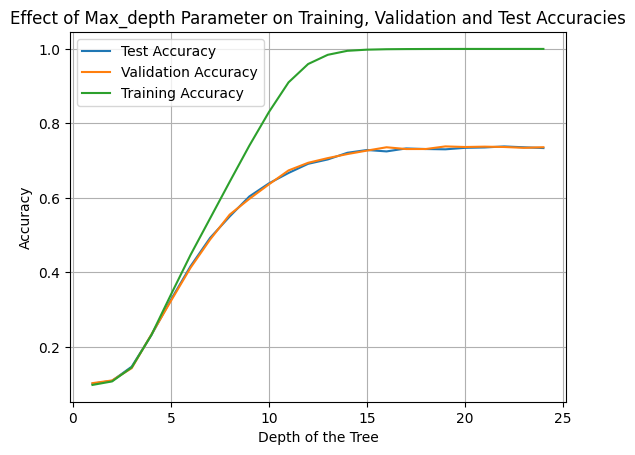

In [ ]:
#Printing best model and its test accuracy
print("Best random forest model based on validation score: ",RFCbest_model)
print("Test accuracy of that best model: ", RFCbest_model.score(combined_x_test_flattened, combined_y_test))

#Plots to visualize the training, test and validation errors for different tree depths
plt.plot(range(1, 25),RFCscorestest,label='Test Accuracy')
plt.plot(range(1, 25),RFCscoresval, label='Validation Accuracy')
plt.plot(range(1, 25),RFCscorestrain, label='Training Accuracy')
plt.title('Effect of Max_depth Parameter on Training, Validation and Test Accuracies')
plt.xlabel("Depth of the Tree")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

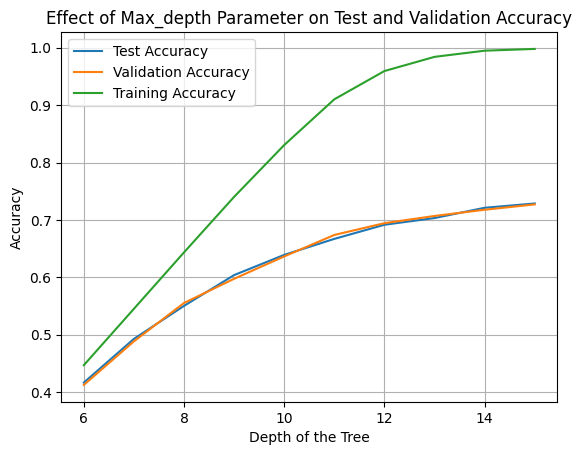

In [ ]:
#Zoomed-in plot to visualize where overfitting happens exactly
plt.plot(np.arange(6, 16),RFCscorestest[5:15],label='Test Accuracy')
plt.plot(np.arange(6, 16),RFCscoresval[5:15], label='Validation Accuracy')
plt.plot(np.arange(6, 16),RFCscorestrain[5:15], label='Training Accuracy')
plt.title('Effect of Max_depth Parameter on Test and Validation Accuracy')
plt.xlabel("Depth of the Tree")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Hyperparameter tuning by setting the parameters: min_samples_split and min_samples_leaf
RFCscorestest_tuning = []
RFCscoresval_tuning = []
RFCscorestrain_tuning = []
RFCbest_model_tuning = None
RFCbest_val_tuning = -1

'''
This code iterates through every single max_depth value from 1 to 25 saves the training, test, and validation accuracies.
It also keeps track of the best model by comparing the validation accuracy for each iteration, and chooses the model with the highest validation accuracy.
'''
for maxdepth in range(3, 15):
    #Setting values for the hyperparameters: min_samples_split and min_samples_leaf
    RFClass = RandomForestClassifier(max_depth=maxdepth,min_samples_split=10,min_samples_leaf=5,   n_estimators=100,random_state=42)
    RFClass.fit(combined_x_train_flattened, combined_y_train)

    #Evaluate the model on the training set
    train = RFClass.score(combined_x_train_flattened, combined_y_train)
    RFCscorestrain_tuning.append(train)

    #Evaluate the model on the validation set to choose best model
    val = RFClass.score(combined_x_val_flattened, combined_y_val)
    RFCscoresval_tuning.append(val)

    #Evaluate the model on the test set
    test = RFClass.score(combined_x_test_flattened, combined_y_test)
    RFCscorestest_tuning.append(test)
    if val > RFCbest_val_tuning:
        RFCbest_val_tuning = val
        RFCbest_model_tuning = RFClass

Best model based on validation score:  RandomForestClassifier(max_depth=19)
Best testing score:  0.7304


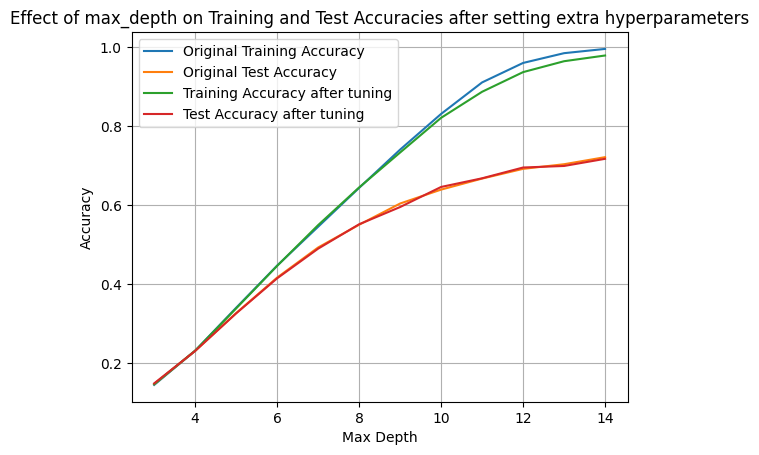

In [ ]:
#Printing best model and its test accuracy
print("Best model based on validation score: ", RFCbest_model_tuning)
print("Best testing score: ", RFCbest_model_tuning.score(combined_x_test_flattened, combined_y_test))

#Plots to visualize the training and test accuracies for different tree depths after setting min_samples_split and min_samples_leaf
plt.plot(range(3, 15), RFCscorestrain[2:14], label="Original Training Accuracy")
plt.plot(range(3, 15), RFCscorestest[2:14], label="Original Test Accuracy")

#Plots to visualize the training and test accuracies for different tree depths after setting min_samples_split and min_samples_leaf
plt.plot(range(3, 15), RFCscorestrain_tuning, label="Training Accuracy after tuning")
plt.plot(range(3, 15), RFCscorestest_tuning, label="Test Accuracy after tuning")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of max_depth on Training and Test Accuracies after setting extra hyperparameters')
plt.grid(True)
plt.show()


In [ ]:
#Visualizing results at the last depth before overfitting
print("Layers where overfitting happens",overfitting_depths)

#Random forest model with max_depth=overfitting_depths[0]-1: last layer before overfitting happens
RFClassOver = RandomForestClassifier(max_depth =overfitting_depths[0]-1,min_samples_split=10,min_samples_leaf=5 )
RFClassOver.fit(combined_x_train_flattened,combined_y_train)

#Computing test, validation and training accuracies for this Random forest model
trainOver=RFClassOver.score(combined_x_train_flattened, combined_y_train)
valOver=RFClassOver.score(combined_x_val_flattened, combined_y_val)
testOver=RFClassOver.score(combined_x_test_flattened, combined_y_test)

print("Training accuracy for Random forest with max_depth=",overfitting_depths[0]-1, " is:", trainOver)
print("Testing accuracy for Random forest with max_depth=",overfitting_depths[0]-1, " is:", testOver)
print("Validation accuracy for Random forest with max_depth=",overfitting_depths[0]-1, " is:",valOver)


Layers where overfitting happens [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Training accuracy for Random forest with max_depth= 8  is: 0.6426458333333334
Testing accuracy for Random forest with max_depth= 8  is: 0.5572
Validation accuracy for Random forest with max_depth= 8  is: 0.5516666666666666
